# ASSIGNMENT1-Computer Vision
# MUHAMMED SHIFAN P
# B180501CS

### 1. Take a real image( Your own color photograph of size 256x256) and do the following

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

In [2]:
# I am basically using OpenCv library to accept input and Matplotlib library to output it
# OpenCv is following BGR
# Matplotlib is following RGB
# So we need to convert to RGB format while outputing the image 

def show_image(img):#used to output Gray Scale image
    rgb=cv.cvtColor(img,cv.COLOR_GRAY2RGB)
    plt.imshow(rgb)
    plt.show()

def show_image_BGR(img):#used to output normal image
    rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.show()

### a) Read it to memory from the file

In [3]:
img=cv.imread(r"D:\NIT Calicut\Sem 7\Computer Vision\My Photo.jpg")

### b) Display it 


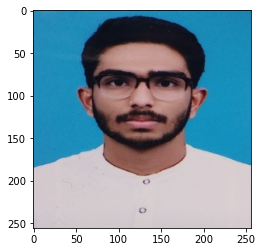

In [4]:
show_image_BGR(img)

### c) Read a portion of it to memory

In [5]:
portion_img=img[70:150,70:150]

### d) Display it


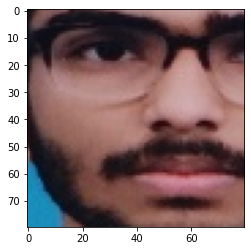

In [6]:
show_image_BGR(portion_img)

### e) add a constant to this portion and then display it


In [7]:
print(np.max(portion_img))
# if we are adding a value greater than (255-np.max(portion_img)) then those bit will overflow
# here np.max(portion_img)=214 That implies adding constant greater than 41(255-214) will cause overflow

214


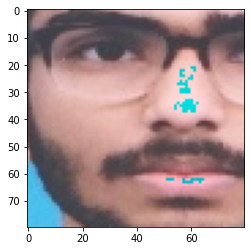

In [8]:
# Note here few pixels are having different colour this is because of the overflow
show_image_BGR(portion_img.copy()+50)

### f) display the whole image after adding a constant to a portion of it. Take care of overflow while adding. ( on overflow, take the pixel vale as the maximum possible )

In [9]:
def overflow_control_add(img,k):
    m,n,_=np.shape(img)
    #print(m,n)
    #value=19
    maxm=0
    for p in range(m):
        for q in range(n):
            for r in range(3):  
                value=int(img[p,q,r])
                value=value+k
                if value>255:
                    img[p,q,r]=255
                else:
                    img[p,q,r]=value
    
    show_image_BGR(img)

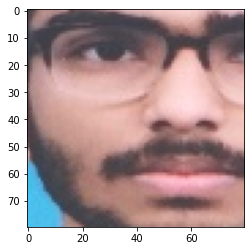

In [10]:
overflow_control_add(portion_img.copy(),50)

### g) multiply a portion of the image by a constant ranging from 0.1 to 2.0, truncating to maximum value on over flow. Display the resulting image for each value of the constant multiplier.


In [11]:
def overflow_control_multiply(img,k):
    m,n,_=np.shape(img)
    #print(m,n)
    #value=19
    maxm=0
    for p in range(m):
        for q in range(n):
            for r in range(3):  
                value=int(img[p,q,r])
                value=value*k
                if value>255:
                    img[p,q,r]=255
                else:
                    img[p,q,r]=value
    
    show_image_BGR(img)

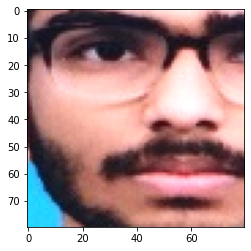

In [12]:
overflow_control_multiply(portion_img.copy(),1.5)

### h) Create a second image which contains only your name and date of doing the assignment, and embed this to to your photograph as a visible watermark.

In [13]:
def visible_watermark(first,second):
    m,n,_=np.shape(first)
    for i in range(m):
        for j in range(n):
            for k in range(3):
                if(second[i,j,k]==0):
                    first[i,j,k]=0
    return first

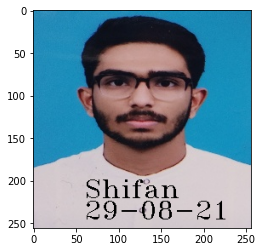

In [14]:
watermark=np.ones((256,256,3),dtype='uint8')
watermark=watermark*255
cv.putText(watermark,"Shifan",(60,220),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,0,0))
cv.putText(watermark,"29-08-21",(60,245),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,0,0))
img_visible_watermark=visible_watermark(img.copy(),watermark.copy())
show_image_BGR(img_visible_watermark)

### i) Embed the second image(name &date) as an invisible watermark in your photograph.(also write code for extracting the watermark)

In [15]:
def invisible_watermark(first,second):
    m,n,_=np.shape(first)
    for i in range(m):
        for j in range(n):
            for k in range(3):
                if(second[i,j,k]==0 and first[i,j,k]%2==1):
                    first[i,j,k]=first[i,j,k]+1
                if(second[i,j,k]==255 and first[i,j,k]%2==0):
                    first[i,j,k]=first[i,j,k]+1
    return first

In [16]:
def extract_watermark(first):
    watermark=np.ones((256,256,3),dtype='uint8')
    watermark=watermark*255
    m,n,_=np.shape(first)
    for i in range(m):
        for j in range(n):
            for k in range(3):
                if(first[i,j,k]%2==0):
                    watermark[i,j,k]=0
    return watermark

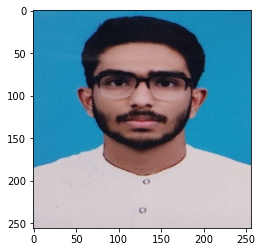

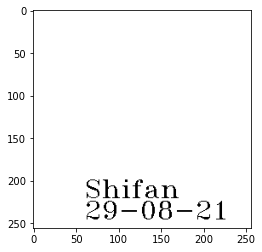

In [17]:
watermark=np.ones((256,256,3),dtype='uint8')
watermark=watermark*255
cv.putText(watermark,"Shifan",(60,220),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,0,0))
cv.putText(watermark,"29-08-21",(60,245),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,0,0))
img_invisible_watermark=invisible_watermark(img.copy(),watermark.copy())
show_image_BGR(img_invisible_watermark)
extracted=extract_watermark(img_invisible_watermark)
show_image_BGR(extracted)

### j) Embed a text message in the image.(Text message should be your name and roll no.)


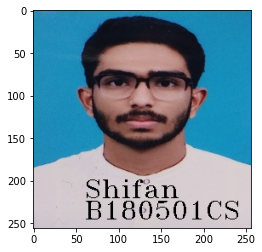

In [18]:
text_img=img.copy()
cv.putText(text_img,"Shifan",(60,220),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,0,0))
cv.putText(text_img,"B180501CS",(60,245),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,0,0))
show_image_BGR(text_img)

### k) Convert the RGB image into XYZ Color Space and Display the luminance and chrominance images separately.

In [19]:
def convertRGBtoXYZ(img):
    ans=np.zeros((256,256,3),dtype='uint8')
    m,n,_=np.shape(img)
    for i in range(m):
        for j in range(n):
            for k in range(3):
                if(k==0):#currently image is in BGR(since inputed using OpenCV)
                    img[i,j,k]=(0.49*img[i,j,2]+0.31*img[i,j,1]+0.20*img[i,j,0])/0.17697
                if(k==1):#currently image is in BGR(since inputed using OpenCV)
                    ans[i,j,k]=(0.17697*img[i,j,2]+0.81240*img[i,j,1]+0.01063*img[i,j,0])/0.17697
                if(k==2):#currently image is in BGR(since inputed using OpenCV)
                    ans[i,j,k]=(0.00*img[i,j,2]+0.01*img[i,j,1]+0.99*img[i,j,0])/0.17697
    return ans

In [20]:
def chrominance(img):
    ans=np.float32(img)
    m,n,_=np.shape(img)
    for i in range(m):
        for j in range(n):
            deno=(ans[i,j,0]+ans[i,j,1]+ans[i,j,2])
            for k in range(3):
                ans[i,j,k]=ans[i,j,k]/deno
    return ans

In [21]:
XYZ_img=convertRGBtoXYZ(img.copy())

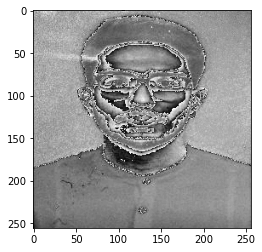

In [22]:
luminance=XYZ_img[:,:,1]
show_image(luminance)

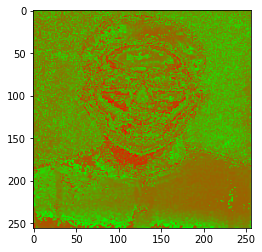

In [23]:
show_image_BGR(chrominance(XYZ_img))

### l) Convert the Color image into a grayscale image.

In [24]:
#0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue
def convertRGBtoGrayScale(img):
    ans=np.zeros((256,256),dtype='uint8')
    m,n,_=np.shape(img)
    for i in range(m):
        for j in range(n):
            for k in range(3):
                ans[i,j]=0.299*img[i,j,0]+0.587*img[i,j,1]+0.114*img[i,j,2]
    return ans

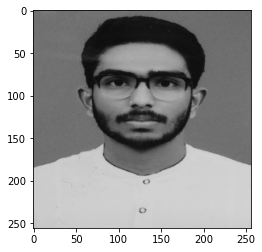

[[116 119 118 ... 105 106 109]
 [114 116 116 ... 106 105 103]
 [113 119 115 ... 108 108 105]
 ...
 [190 191 193 ... 204 203 202]
 [188 190 193 ... 205 204 202]
 [187 189 194 ... 205 204 202]]


In [25]:
rgb_img=cv.cvtColor(img,cv.COLOR_BGR2RGB)#currently image is in BGR(since inputed using OpenCV)
gray_img=(convertRGBtoGrayScale(rgb_img))
show_image(gray_img)
print(gray_img)

### m)Apply thresholding on the grayscale using 4 different threshold values(e.g, 50, 128, 175, & 220) and display the 4 output images

In [26]:
def thershold(gray,k):
    m,n=np.shape(gray)
    #print(k)
    count=0
    for i in range(m):
        for j in range(n):
            if(gray[i,j]>=k):
                #count=count+1
                gray[i,j]=255
            else:
                gray[i,j]=0
    #print(count)
    return gray

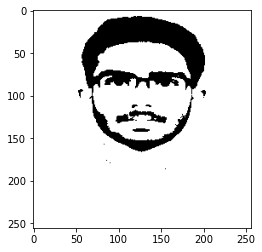

In [27]:
gray_img_50=thershold(gray_img.copy(),50)
show_image(gray_img_50)

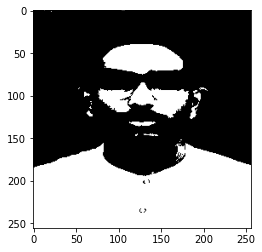

In [28]:
gray_img_128=thershold(gray_img.copy(),128)
show_image(gray_img_128)

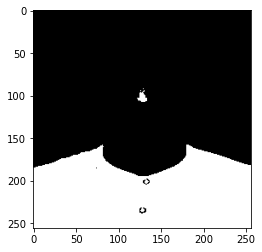

In [29]:
gray_img_175=thershold(gray_img.copy(),175)
show_image(gray_img_175)

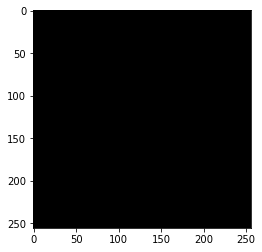

In [30]:
gray_img_220=thershold(gray_img.copy(),220)
show_image(gray_img_220)